<a href="https://colab.research.google.com/github/Chakawak77/Instagram-/blob/master/Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np


In [5]:
# Load in mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to each image to a row vector and column vector
x_train_rowvector = np.reshape(x_train, (-1, 28*28))
x_train_colvector = np.copy(x_train_rowvector).T
x_test_rowvector = np.reshape(x_test, (-1, 28*28))
x_test_colvector = np.copy(x_test_rowvector).T

# Take small sample of 2000 training images
x_train_colvector_sample2000 = x_train_colvector[:, :2000]
y_train_sample2000 = y_train[:2000]

# Take small sample of 200 testing images
x_test_colvector_sample200 = x_test_colvector[:, :200]
y_test_sample200 = y_test[:200]

11490434/11490434 [==============================] - 0s 0us/step


Label:  5


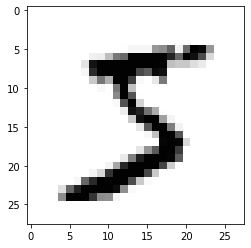

Label:  0


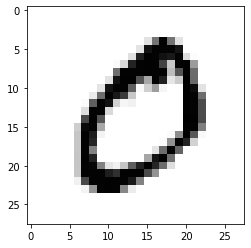

Label:  4


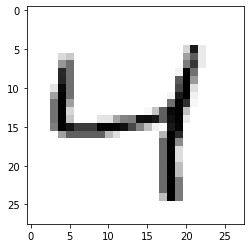

Label:  1


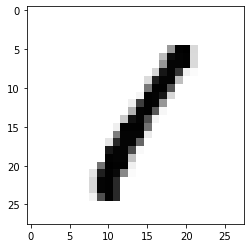

Label:  9


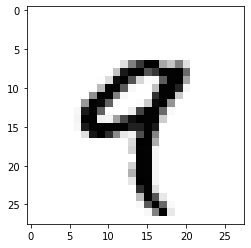

Label:  2


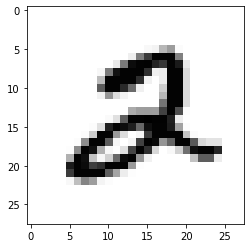

Label:  1


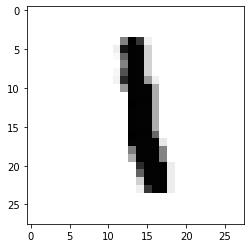

In [6]:
# Visualize a few samples
for i in range(7):
    print("Label: ", y_train[i])
    image = x_train_colvector[:, i]
    plt.imshow(image.reshape(28, 28), cmap="Greys")
    plt.show()
    plt.close()

In [7]:
# Calculate the covariance matrix
covariance = np.cov(x_train_colvector_sample2000)
# Calculate the eigenvalues and the eigenvectors for the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance)
# Get the real part of the eigenvalues and eigenvectors only
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)
# Project original data onto eigenvectors
pca = np.dot(x_train_colvector_sample2000.T, eigenvectors)
# Get only the first two columns for the first two principal components
pca = pca[:, 0:2]

In [8]:
pca_list= [0] * 10
y_list = [0] * 10
for i in range(10):
    pca_list[i] = (pca[y_train_sample2000 == i])
    y_list[i] = (y_train_sample2000[y_train_sample2000 == i])

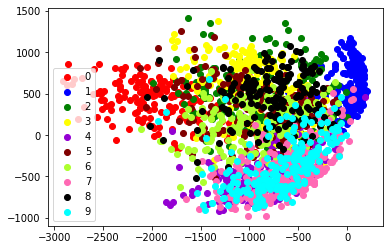

In [9]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    pca_current_label = pca_list[i]
    ax.scatter(pca_current_label[:, 0], pca_current_label[:, 1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()

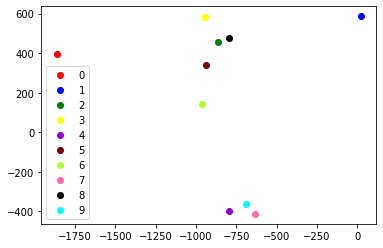

In [10]:
pca_mean_list = [0] * 10
for i in range(10): 
    pca_mean_list[i] = np.mean(pca_list[i], axis=0)
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    pca_current_label = pca_mean_list[i]
    ax.scatter(pca_current_label[0], pca_current_label[1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()  

In [11]:
import numpy as np
# Calculate u, s, v
u, s, v = np.linalg.svd(x_train_colvector_sample2000, full_matrices=False)
# Set all singular values greater than the first two to 0
for i in range(2, s.shape[0]):
    s[i] = 0
# Calculate the reduced dimensions with svd
svd_cords = np.diag(s) @ v

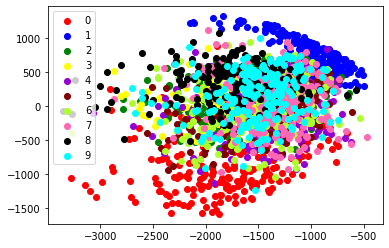

In [13]:
svd_list= [0] * 10
for i in range(10):
    svd_list[i] = (svd_cords.T[y_train_sample2000 == i])
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    svd_current_label = svd_list[i]
    ax.scatter(svd_current_label[:, 0], svd_current_label[:, 1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()  

In [14]:
svd_mean_list = [0] * 10
for i in range(10): 
    svd_mean_list[i] = np.mean(svd_list[i], axis=0)

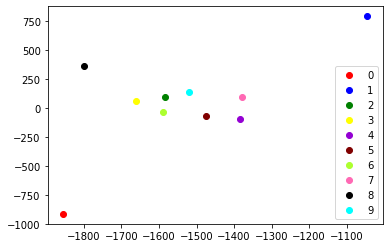

In [15]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    svd_current_label = svd_mean_list[i]
    ax.scatter(svd_current_label[0], svd_current_label[1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()